## Data Set-up

In [249]:
import pandas as pd
import plotnine as p9
from collections import defaultdict

df_avocado = pd.read_csv('./Data/avocado-updated-2020.csv')
df_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


Information includes date of observation, average price of a single avocado, total avocados sold, number of avocados with PLU 4046/4225/4770 sold, number of bags as well as a breakdown of bag size, conventional or organic type, year, and place of observation.

In [250]:
df_cleaned = df_avocado
df_cleaned.rename(columns={'4046': 'small',
                           '4225': 'large',
                           '4770': 'extra_large'}, inplace=True)
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

In [251]:
regions = {
    "Albany": 'Northeast',
    "Sacramento": 'California',
    "Northeast": 'Northeast',
    "Northern New England": 'Northeast',
    "Orlando": 'Southeast',
    "Philadelphia": 'Northeast',
    "Phoenix/Tucson": 'West',
    "Pittsburgh": 'Northeast',
    "Plains": 'Plains',
    "Portland": 'West',
    "Raleigh/Greensboro": 'Southeast',
    "Richmond/Norfolk": 'Southeast',
    "Roanoke": 'Southeast',
    "San Diego": 'California',
    "Atlanta": 'Southeast',
    "San Francisco": 'California',
    "Seattle": 'West',
    "South Carolina": 'Southeast',
    "South Central": 'South Central',
    "Southeast": 'Southeast',
    "Spokane": 'West',
    "St. Louis": 'Midsouth',
    "Syracuse": 'Northeast',
    "Tampa": 'Southeast',
    "Total U.S.": 'Total U.S.',
    "West": 'West',
    "New York": 'Northeast',
    "New Orleans/Mobile": 'South Central',
    "Nashville": 'Midsouth',
    "Midsouth": 'Midsouth',
    "Baltimore/Washington": 'Northeast',
    "Boise": 'West',
    "Boston": 'Northeast',
    "Buffalo/Rochester": 'Northeast',
    "California": 'California',
    "Charlotte": 'Southeast',
    "Chicago": 'Great Lakes',
    "Cincinnati/Dayton": 'Great Lakes',
    "Columbus": 'Great Lakes',
    "Dallas/Ft. Worth": 'South Central',
    "Denver": 'West',
    "Detroit": 'Great Lakes',
    "Grand Rapids": 'Great Lakes',
    "Great Lakes": 'Great Lakes',
    "Harrisburg/Scranton": 'Northeast',
    "Hartford/Springfield": 'Northeast',
    "Houston": 'South Central',
    "Indianapolis": 'Great Lakes',
    "Jacksonville": 'Southeast',
    "Las Vegas": 'West',
    "Los Angeles": 'California',
    "Louisville": 'Midsouth',
    "Miami/Ft. Lauderdale": 'Southeast',
    "West Tex/New Mexico": 'West'
}

major_regions = ["California", "Great Lakes", "Midsouth", "Northeast", "Plains", "Southeast", "South Central", "West"]
region_type = dict.fromkeys(major_regions, 'Region')
region_type = defaultdict(lambda: 'City', region_type)
region_type["Total U.S."] = "Total"

df_cleaned['region'] = df_cleaned['geography'].map(regions)
df_cleaned['region_type'] = df_cleaned['geography'].map(region_type)
df_cleaned.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Northeast,City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Northeast,City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Southeast,City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Southeast,City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Northeast,City


## Exercises

In [252]:
df_filtered = df_cleaned[(df_cleaned['type'] == "organic") & (df_cleaned['year'] == 2017) & (df_cleaned['region_type'] == "Region")]
small_sales = df_filtered.groupby('region')['small'].sum().sort_values(ascending=False)
print(f"{small_sales.idxmax()}: {small_sales.max()}")

West: 1870206.29


In [253]:
df_cleaned['month'] = df_cleaned['date'].dt.strftime('%B')
df_cleaned['day'] = df_cleaned['date'].dt.day
df_total = df_cleaned[df_cleaned['region_type'] == "Total"]
month_sales = df_total.groupby('month')['total_volume'].mean().sort_values(ascending=False)
print(f"{month_sales.idxmax()}: {month_sales.max()}")

May: 22932034.62259259


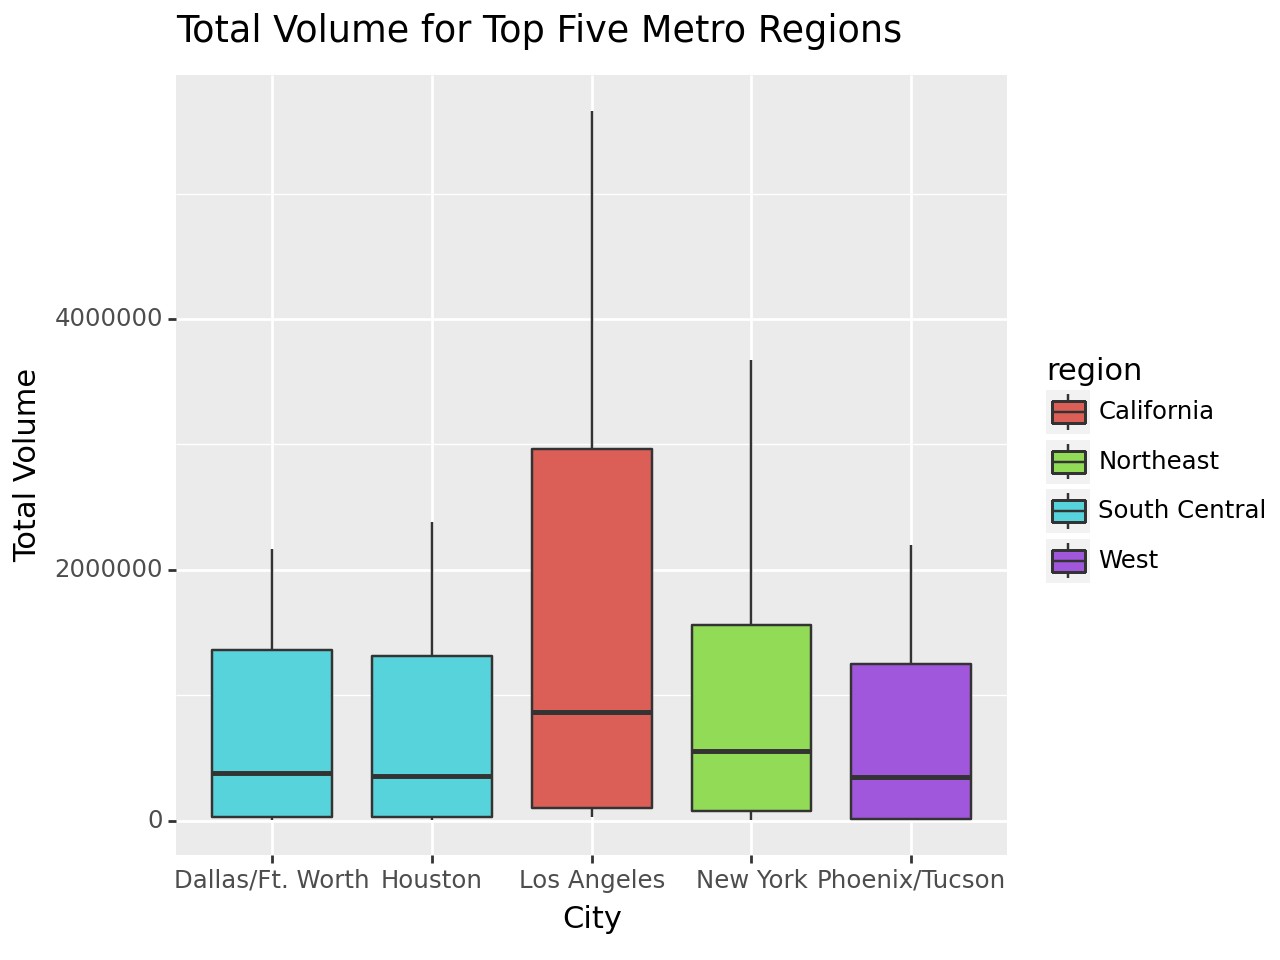

In [254]:
df_cities = df_cleaned[df_cleaned['region_type'] == "City"]
top_five = df_cities.groupby('geography')['total_volume'].mean().nlargest(5).index
df_top_five = df_cleaned[df_cleaned['geography'].isin(top_five)]

plot = (p9.ggplot(data=df_top_five,
                 mapping=p9.aes(x='geography',
                                y='total_volume',
                                fill='region'))
        + p9.geom_boxplot()
        + p9.labs(title='Total Volume for Top Five Metro Regions',
                  x='City',
                  y='Total Volume'))

plot.draw()

## Pivoting

In [255]:
df_ca = df_cleaned[(df_cleaned['region'] == "California") & (df_cleaned['region_type'] == "City")]
df_ca.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,region_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,California,City,January,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,California,City,January,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,California,City,January,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,California,City,January,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,California,City,January,4


In [256]:
df_ca_pivot = df_ca.pivot_table(index='geography', columns='type', values='average_price', aggfunc='mean')
df_ca_pivot['difference'] = df_ca_pivot['organic'] - df_ca_pivot['conventional']
df_ca_pivot

type,conventional,organic,difference
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


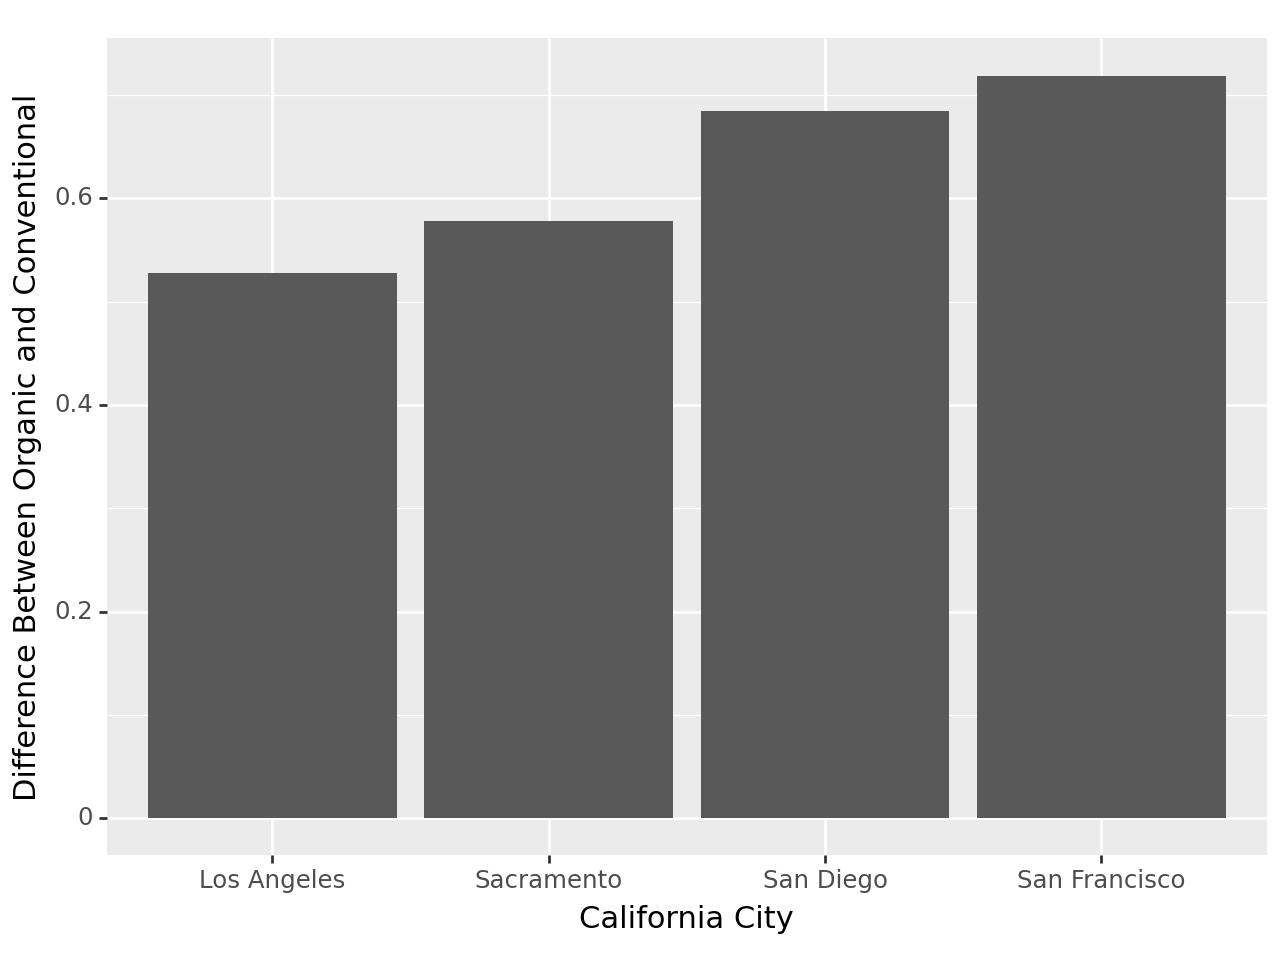

In [257]:
plot = (p9.ggplot(data=df_ca_pivot.reset_index(),
                  mapping=p9.aes(x='geography',
                                 y='difference')) 
        + p9.geom_bar(stat='identity')
        + p9.labs(y='Difference Between Organic and Conventional', x='California City')
)

plot.draw()

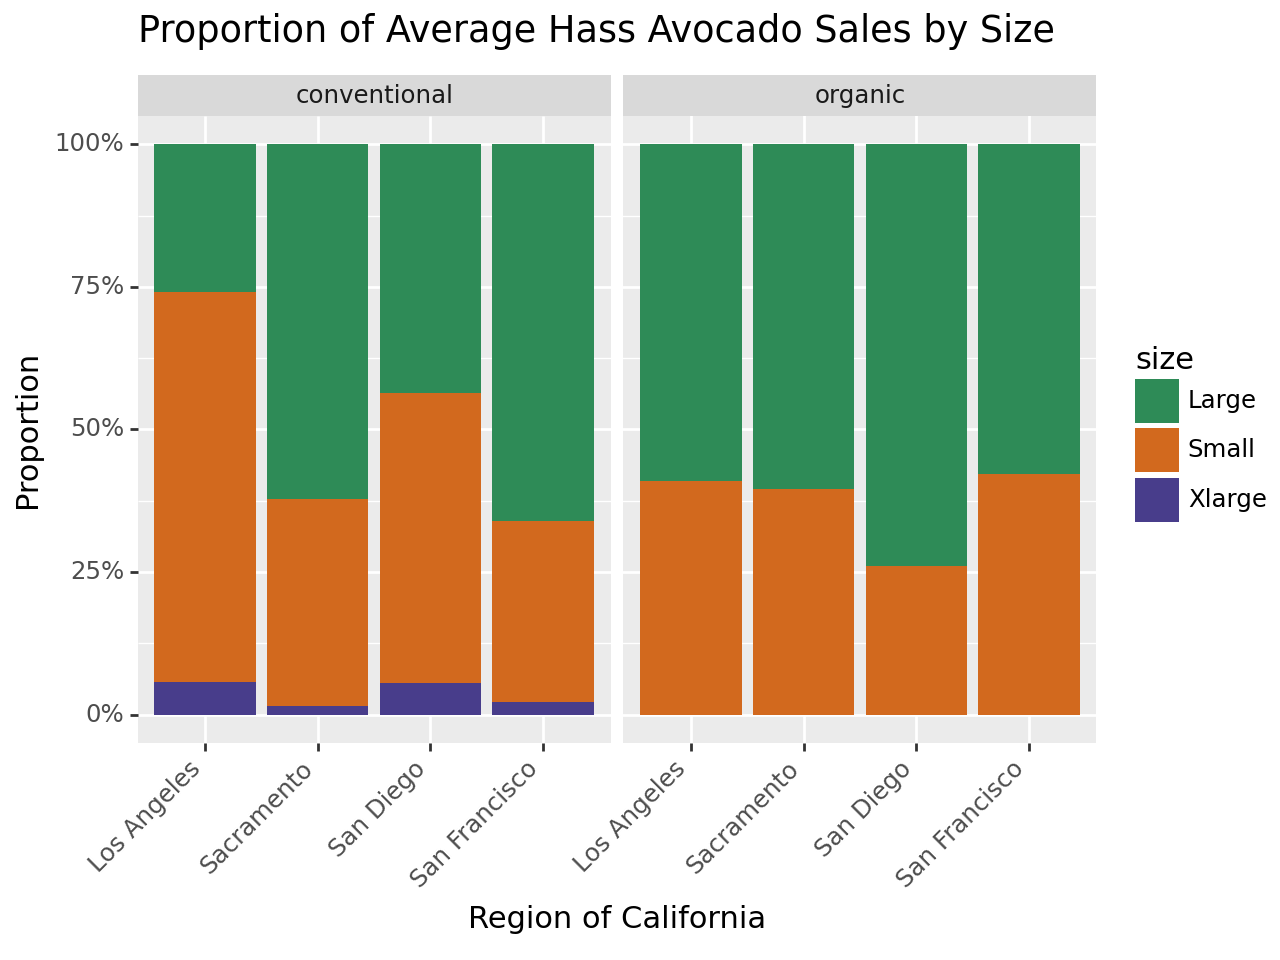

In [258]:
labels = [f"{p}%" for p in range(0, 101, 25)]

size_colors = {
    'Small': 'chocolate',
    'Large': 'seagreen',
    'Xlarge': 'darkslateblue'
}

df_size = df_ca.groupby(['geography', 'type'])[['small', 'large', 'extra_large']].sum().reset_index()
df_size['total_volume'] = df_size[['small', 'large', 'extra_large']].sum(axis=1)

df_size['Small'] = df_size['small'] / df_size['total_volume']
df_size['Large'] = df_size['large'] / df_size['total_volume']
df_size['Xlarge'] = df_size['extra_large'] / df_size['total_volume']

df_melt = df_size.melt(id_vars=['geography', 'type'], 
                       value_vars=['Small', 'Large', 'Xlarge'],
                       var_name='size',
                       value_name='proportion')

plot = (p9.ggplot(data=df_melt, 
                  mapping=p9.aes(x='geography',
                                 y='proportion',
                                 fill='size'))
        + p9.geom_bar(stat='identity', position='stack')
        + p9.facet_wrap('type')
        + p9.labs(title='Proportion of Average Hass Avocado Sales by Size',
                  x='Region of California',
                  y='Proportion')
        + p9.scale_fill_manual(values=size_colors)
        + p9.scale_y_continuous(labels=labels)
        + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1)))

plot.draw()

## Using Outside Data

housing.csv was generated by ChatGPT using the web browsing feature on trends and median home prices in each city during different years.

In [259]:
df_housing = pd.read_csv('./Data/housing.csv')
df_housing.head()

,City,Year,House Price
0,Los Angeles,2017,600000
1,Los Angeles,2018,630000
2,Los Angeles,2019,660000
3,Los Angeles,2020,690000
4,San Francisco,2017,1200000


In [260]:
df_merge = pd.merge(df_ca, df_housing, left_on=['geography', 'year'], right_on=['City', 'Year']).drop(columns=['Year', 'City'])
df_merge.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,region_type,month,day,House Price
0,2017-01-01,0.84,3551337.17,1223299.39,829896.69,56808.74,1441332.35,1332601.11,88931.96,19799.28,conventional,2017,Los Angeles,California,City,January,1,600000
1,2017-01-01,1.07,99950.32,15830.84,28951.76,1.56,55166.16,43159.57,12006.59,0.00,organic,2017,Los Angeles,California,City,January,1,600000
2,2017-01-08,0.89,3120961.67,969758.40,692908.87,72814.14,1385480.26,1288525.30,72837.94,24117.02,conventional,2017,Los Angeles,California,City,January,8,600000
3,2017-01-08,1.19,112953.28,18961.66,33123.81,3.12,60864.69,57800.85,3063.84,0.00,organic,2017,Los Angeles,California,City,January,8,600000
4,2017-01-15,0.76,3363407.98,1075572.75,703853.31,61161.98,1522819.94,1442445.76,59205.75,21168.43,conventional,2017,Los Angeles,California,City,January,15,600000


In [261]:
df_merge['avocado spending'] = df_merge['total_volume'] * df_merge['average_price']
avocado_spending = df_merge['avocado spending']
housing_spending = df_merge['House Price']
avocado_spending.corr(housing_spending)

0.05283542823113373

In [262]:
avacado_prices = df_merge['average_price']
avacado_prices.corr(housing_spending)

0.1858681447135978

In [263]:
avacados = df_merge['total_volume']
avacados.corr(housing_spending)

0.012673375153375964

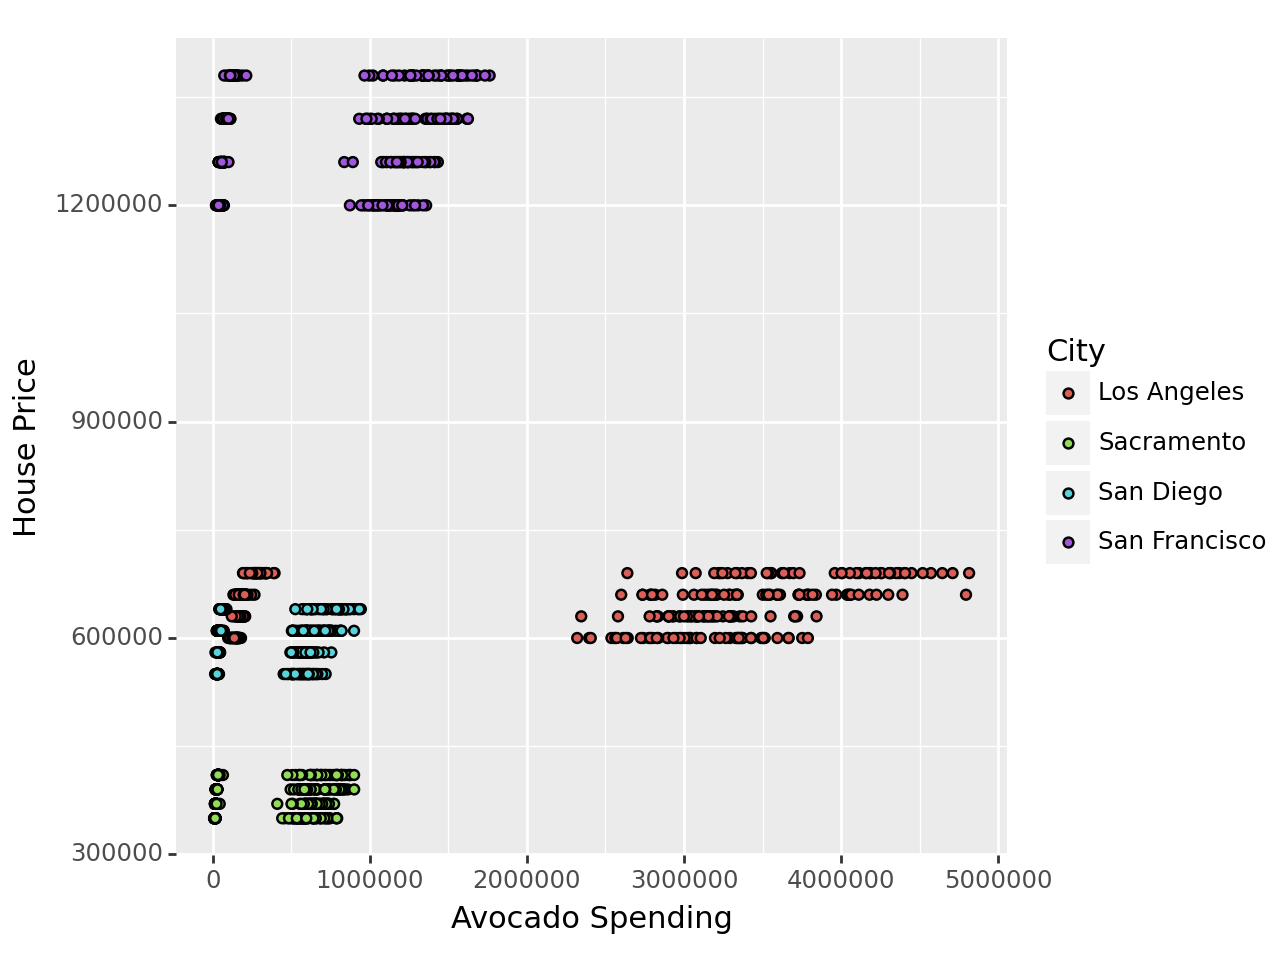

In [264]:
plot = (p9.ggplot(data=df_merge,
                  mapping=p9.aes(x='avocado spending',
                                 y='House Price',
                                 fill='geography'))
        + p9.geom_point()
        + p9.labs(x='Avocado Spending',
                  y='House Price',
                  fill='City'))

plot.draw()

There seems to be a very small positive correlation between avacado spending, which I calculated as the total volume multiplied by the average price, and housing price. There seems to be a stronger correlation between housing prices and average avacado prices, which is reasonable as more expensive areas (i.e., San Francisco) would likely be more expensive in general, avacado prices included. There seems to be little to no correclation between avacados purchased and housing prices, implying that the housing prices don't affect how many avacados an individual buys. However, the housing data is both artificially generated (based on real data though) and a very small sample size, so the results are likely incocnlusive.